# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

# Read the CSV

In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning

Checking to see if there are any null values in the dataset. 

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are **no null values** in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


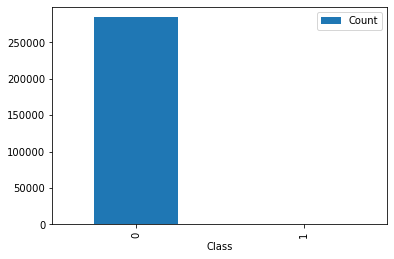

In [5]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284,807 transactions, which is a mere **0.17%**.

# Defining features

Defining the predictor features and the target feature.

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

Using `Class` for the y values (target feature)

In [9]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [11]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Decision Tree Classifier Model

### Train the Model

In [12]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel

DecisionTreeClassifier()

In [13]:
decisionTreeModel.fit(X_train_scaled, y_train.flatten())

DecisionTreeClassifier()

In [14]:
print(f"Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9990871042948232


In [15]:
# Make predictions with the model
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)

In [16]:
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]

In [17]:
# Print classification report
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(y_test.flatten(), decisionTreePredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.70      0.73      0.72       113

      accuracy                           1.00     71202
     macro avg       0.85      0.87      0.86     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9990871042948232


Decision Tree Classifier
Accuracy:  0.9990871042948232
Precision:  0.7033898305084746
Recall:  0.7345132743362832
F1-Score:  0.7186147186147187
AUC score:  0.867010466874566
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.70      0.73      0.72       113

      accuracy                           1.00     71202
     macro avg       0.85      0.87      0.86     71202
  weighted avg       1.00      1.00      1.00     71202



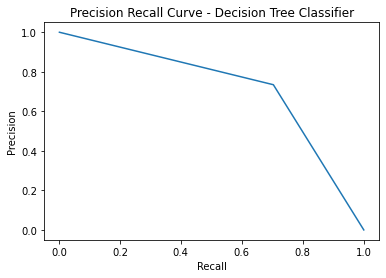

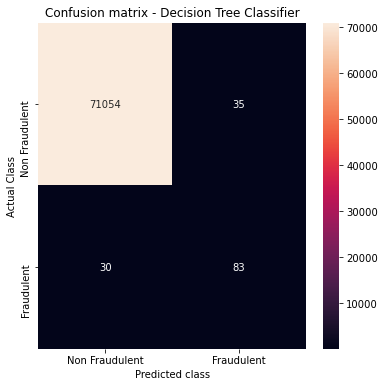

In [18]:
print("Decision Tree Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
decisionTreeModel.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [20]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
decisionTreeParamGrid = {'criterion':['gini', 'entropy'],
                         'splitter': ['best','random'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
decisionTreeGrid = GridSearchCV(decisionTreeModel, decisionTreeParamGrid, verbose=3)

In [21]:
# Train the model with GridSearch
decisionTreeGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] criterion=gini, max_depth=None, splitter=best ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=None, splitter=best, score=0.999, total=  13.0s
[CV] criterion=gini, max_depth=None, splitter=best ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, splitter=best, score=0.999, total=  10.1s
[CV] criterion=gini, max_depth=None, splitter=best ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, splitter=best, score=0.999, total=   9.5s
[CV] criterion=gini, max_depth=None, splitter=best ...................
[CV]  criterion=gini, max_depth=None, splitter=best, score=0.999, total=  12.5s
[CV] criterion=gini, max_depth=None, splitter=best ...................
[CV]  criterion=gini, max_depth=None, splitter=best, score=0.999, total=  10.8s
[CV] criterion=gini, max_depth=None, splitter=random .................
[CV]  criterion=gini, max_depth=None, splitter=random, score=0.999, total=   1.5s
[CV] criterion=gini, max_depth=None, splitter=random .................
[CV]  criterion=gini, max_depth=None, splitter=random, score=0.999, total=   1.3s
[CV] criterion=gini, max_depth=None, splitter=random .................
[CV]  criterion=gini, max_depth=None, splitter=random, score=0.999, total=   1.6s
[CV] criterion=gini, max_depth=None, splitter=random .................
[CV]  criterion=gini, max_depth=None, splitter=random, score=0.999, total=   1.2s
[CV] c

[CV]  criterion=gini, max_depth=5, splitter=random, score=0.999, total=   0.6s
[CV] criterion=gini, max_depth=5, splitter=random ....................
[CV]  criterion=gini, max_depth=5, splitter=random, score=0.999, total=   0.5s
[CV] criterion=gini, max_depth=5, splitter=random ....................
[CV]  criterion=gini, max_depth=5, splitter=random, score=0.999, total=   0.4s
[CV] criterion=gini, max_depth=6, splitter=best ......................
[CV]  criterion=gini, max_depth=6, splitter=best, score=1.000, total=   3.8s
[CV] criterion=gini, max_depth=6, splitter=best ......................
[CV]  criterion=gini, max_depth=6, splitter=best, score=0.999, total=   3.9s
[CV] criterion=gini, max_depth=6, splitter=best ......................
[CV]  criterion=gini, max_depth=6, splitter=best, score=0.999, total=   4.0s
[CV] criterion=gini, max_depth=6, splitter=best ......................
[CV]  criterion=gini, max_depth=6, splitter=best, score=0.999, total=   4.0s
[CV] criterion=gini, max_dept

[CV]  criterion=entropy, max_depth=None, splitter=best, score=0.999, total=   5.9s
[CV] criterion=entropy, max_depth=None, splitter=best ................
[CV]  criterion=entropy, max_depth=None, splitter=best, score=0.999, total=   5.1s
[CV] criterion=entropy, max_depth=None, splitter=best ................
[CV]  criterion=entropy, max_depth=None, splitter=best, score=0.999, total=   6.4s
[CV] criterion=entropy, max_depth=None, splitter=random ..............
[CV]  criterion=entropy, max_depth=None, splitter=random, score=0.999, total=   0.8s
[CV] criterion=entropy, max_depth=None, splitter=random ..............
[CV]  criterion=entropy, max_depth=None, splitter=random, score=0.999, total=   1.0s
[CV] criterion=entropy, max_depth=None, splitter=random ..............
[CV]  criterion=entropy, max_depth=None, splitter=random, score=0.999, total=   0.6s
[CV] criterion=entropy, max_depth=None, splitter=random ..............
[CV]  criterion=entropy, max_depth=None, splitter=random, score=0.999,

[CV]  criterion=entropy, max_depth=5, splitter=random, score=0.999, total=   0.4s
[CV] criterion=entropy, max_depth=5, splitter=random .................
[CV]  criterion=entropy, max_depth=5, splitter=random, score=0.999, total=   0.4s
[CV] criterion=entropy, max_depth=5, splitter=random .................
[CV]  criterion=entropy, max_depth=5, splitter=random, score=0.999, total=   0.4s
[CV] criterion=entropy, max_depth=5, splitter=random .................
[CV]  criterion=entropy, max_depth=5, splitter=random, score=0.999, total=   0.4s
[CV] criterion=entropy, max_depth=6, splitter=best ...................
[CV]  criterion=entropy, max_depth=6, splitter=best, score=0.999, total=   4.9s
[CV] criterion=entropy, max_depth=6, splitter=best ...................
[CV]  criterion=entropy, max_depth=6, splitter=best, score=0.999, total=   4.9s
[CV] criterion=entropy, max_depth=6, splitter=best ...................
[CV]  criterion=entropy, max_depth=6, splitter=best, score=0.999, total=   4.9s
[CV] c

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:  9.2min finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [22]:
print(decisionTreeGrid.best_params_)
print(decisionTreeGrid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
0.9994709861660542


In [23]:
# Make predictions with the hyperparameter tuned model
decisionTreeGridPredictions = decisionTreeGrid.predict(X_test_scaled)

In [24]:
# Print classification report
print(classification_report(y_test.flatten(), decisionTreeGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.88      0.78      0.83       113

      accuracy                           1.00     71202
     macro avg       0.94      0.89      0.91     71202
  weighted avg       1.00      1.00      1.00     71202



In [32]:
hypertunedDecisionTreeModel = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, splitter = 'best')
hypertunedDecisionTreeModel

DecisionTreeClassifier(max_depth=8)

In [33]:
hypertunedDecisionTreeModel.fit(X_train_scaled, y_train.flatten())

DecisionTreeClassifier(max_depth=8)

In [34]:
print(f"Training Data Score: {hypertunedDecisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertunedDecisionTreeModel.score(X_test_scaled, y_test)}")

Training Data Score: 0.9996769738536083
Testing Data Score: 0.9994943962248252


In [35]:
hypertunedDecisionTreeModelPredictions = hypertunedDecisionTreeModel.predict(X_test_scaled)

In [36]:
hypertunedDecisionTreeModelPredictProba = hypertunedDecisionTreeModel.predict_proba(X_test_scaled)[:,1]

In [37]:
# Calculate classification report
print(classification_report(y_test.flatten(), hypertunedDecisionTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.88      0.79      0.83       113

      accuracy                           1.00     71202
     macro avg       0.94      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



Decision Tree Classifier
Accuracy:  0.9994943962248252
Precision:  0.8811881188118812
Recall:  0.7876106194690266
F1-Score:  0.8317757009345794
AUC score:  0.8937209084910016
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.88      0.79      0.83       113

      accuracy                           1.00     71202
     macro avg       0.94      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



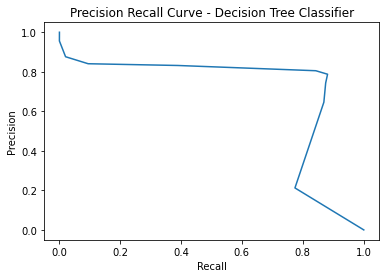

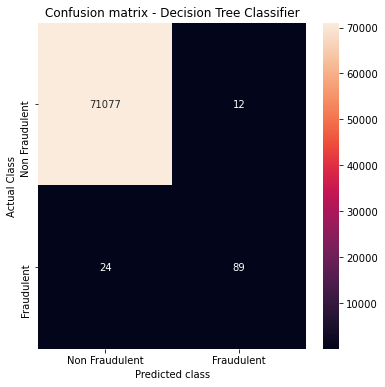

In [38]:
print("Decision Tree Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), hypertunedDecisionTreeModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), hypertunedDecisionTreeModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), hypertunedDecisionTreeModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), hypertunedDecisionTreeModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), hypertunedDecisionTreeModelPredictions))
print(classification_report(y_test.flatten(), hypertunedDecisionTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), hypertunedDecisionTreeModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), hypertunedDecisionTreeModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Feature Selection

In [39]:
feature_names = selected_features.columns
sorted(zip(hypertunedDecisionTreeModel.feature_importances_, feature_names), reverse=True)

[(0.6497273477261745, 'V17'),
 (0.12640320722892687, 'V14'),
 (0.04161488156066856, 'V10'),
 (0.037145054007352005, 'V12'),
 (0.024923242988512007, 'V15'),
 (0.024206575794096335, 'V27'),
 (0.01950950488981318, 'V3'),
 (0.016688804090562462, 'V16'),
 (0.010213996398528002, 'V18'),
 (0.009789492731872691, 'V7'),
 (0.008390250408167392, 'V1'),
 (0.008035350117678227, 'V24'),
 (0.0038512624824374913, 'V8'),
 (0.003329889788900365, 'V4'),
 (0.0030905192760300845, 'V6'),
 (0.0030489161319296795, 'V26'),
 (0.0030295147538507185, 'V20'),
 (0.0027014652775358863, 'V5'),
 (0.002398202541775494, 'V21'),
 (0.001582710609220884, 'V19'),
 (0.0003198111959673224, 'V23'),
 (0.0, 'V9'),
 (0.0, 'V28'),
 (0.0, 'V25'),
 (0.0, 'V22'),
 (0.0, 'V2'),
 (0.0, 'V13'),
 (0.0, 'V11'),
 (0.0, 'Time'),
 (0.0, 'Amount')]

## Choosing Top features

In [40]:
# Set top features. This will be used as x values.
top_features = df[[ 
'V17',
'V14',
'V10',
'V12',
'V15',
'V27',
'V3',
'V16',
'V18',
'V7',
'V1',
'V24',
'V8',
'V4',
'V6',
'V26',
'V20',
'V5',
'V21',
'V19',
'V23',
]]

top_features.head(1)

,V17,V14,V10,V12,V15,V27,V3,V16,V18,V7,...,V24,V8,V4,V6,V26,V20,V5,V21,V19,V23
0,0.207971,-0.311169,0.090794,-0.617801,1.468177,0.133558,2.536347,-0.470401,0.025791,0.239599,...,0.066928,0.098698,1.378155,0.462388,-0.189115,0.251412,-0.338321,-0.018307,0.403993,-0.110474
